In [1]:
import numpy as np               
import pandas as pd 
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# - This package is large and takes some time to download, take the lighter version below.
# nltk.download()
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
reviews = pd.read_csv('imdb_labelled.txt', sep='\t', header=None, names=['Text', 'Sentiment'])
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [4]:
reviews.head()

,Text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
reviews.shape

(748, 2)

## ------------------------  Preperparation ------------------------

In [6]:
reviews['Sentiment'].value_counts()

Sentiment
1    386
0    362
Name: count, dtype: int64

In [7]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[0 0 0 0 1 0 0 1 0 1]
0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Sentiment, dtype: int64


In [8]:
#change the text column datatype to string
reviews = reviews.astype({'Text':'string'})

In [9]:
reviews.dtypes

Text         string[python]
Sentiment             int64
dtype: object

In [10]:
#get the review text for preprocessing
text = reviews['Text']
text[:3]

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
Name: Text, dtype: string

In [11]:
text1 = []
#remove punctuation
for review in text:
    review = review.translate(str.maketrans('', '', string.punctuation))  
    text1.append(review)
 
text1[:5]

['A very very very slowmoving aimless movie about a distressed drifting young man  ',
 'Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  ',
 'Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  ',
 'Very little music or anything to speak of  ',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head  ']

In [12]:
for i in range(3):
    print(f"Original Review: {reviews['Text'][i]}")
    print(f"Processed Review: {text1[i]}")
    print()

Original Review: A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Processed Review: A very very very slowmoving aimless movie about a distressed drifting young man  

Original Review: Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
Processed Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  

Original Review: Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
Processed Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  



In [13]:
text1_2 = []
# remove digits/numbers
for review in text1:
    review = review.translate(str.maketrans('', '', string.digits))
    text1_2.append(review)

# print fisrt 3 processed reviews
for i in range(3):
    print(f"Original Review: {text1[i]}")
    print(f"Processed Review: {text1_2[i]}")
    print()

Original Review: A very very very slowmoving aimless movie about a distressed drifting young man  
Processed Review: A very very very slowmoving aimless movie about a distressed drifting young man  

Original Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  
Processed Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  

Original Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  
Processed Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  



In [14]:
text1_3 = []
#remove stop words
for review in text1_2:
    review_tokens = word_tokenize(review)
    filtered_review = [word for word in review_tokens if word.lower() not in stopwords.words('english')]
    text1_3.append(' '.join(filtered_review))
#     review = review.translate(str.maketrans('', '', string.digits))
#     text1_2.append(review)

# print fisrt 3 processed reviews
for i in range(3):
    print(f"Original Review: {text1_2[i]}")
    print(f"Processed Review: {text1_3[i]}")
    print()

Original Review: A very very very slowmoving aimless movie about a distressed drifting young man  
Processed Review: slowmoving aimless movie distressed drifting young man

Original Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  
Processed Review: sure lost flat characters audience nearly half walked

Original Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  
Processed Review: Attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent



In [15]:
text1_4 = []
#change to lowercase
for review in text1_3:
    review = review.lower()
    #print(sentence)
    text1_4.append(review)

# print fisrt 3 processed reviews
for i in range(3):
    print(f"Original Review: {text1_3[i]}")
    print(f"Processed Review: {text1_4[i]}")
    print()

Original Review: slowmoving aimless movie distressed drifting young man
Processed Review: slowmoving aimless movie distressed drifting young man

Original Review: sure lost flat characters audience nearly half walked
Processed Review: sure lost flat characters audience nearly half walked

Original Review: Attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent
Processed Review: attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent



In [16]:
# finilaise the preprocessed text to text1. 
text1 = pd.Series(text1_4)
text1[:5]

0    slowmoving aimless movie distressed drifting y...
1    sure lost flat characters audience nearly half...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene movie gerardo trying find song keep...
dtype: object

In [17]:
#apply lemmatising
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text2 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w) for w in x.split()))
text2[:5] #notice that it does not do a good job

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    slowmoving aimless movie distressed drifting y...
1    sure lost flat character audience nearly half ...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene movie gerardo trying find song keep...
dtype: object

In [18]:
#apply lemmatising with POS tags

from nltk.corpus import wordnet

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text3 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:5] #notice that it does a better job

0    slowmoving aimless movie distressed drift youn...
1    sure lose flat character audience nearly half ...
2    attempt artiness black white clever camera ang...
3                          little music anything speak
4    best scene movie gerardo try find song keep ru...
dtype: object

In [19]:
# #apply stemming
# ps = nltk.PorterStemmer()

# text4 = text1.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
# text4[:5]

In [20]:
reviews1 = list(zip(text3, label))

reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviewsP

,Review,Sentiment
0,slowmoving aimless movie distressed drift youn...,0
1,sure lose flat character audience nearly half ...,0
2,attempt artiness black white clever camera ang...,0
3,little music anything speak,0
4,best scene movie gerardo try find song keep ru...,1
...,...,...
743,get bore watch jessice lange take clothes,0
744,unfortunately virtue film production work lose...,0
745,word embarrass,0
746,exceptionally bad,0


In [21]:
for i in range(3):
    print(f"Original Review: {reviews['Text'][i]}")
    print(f"Processed Review: {reviewsP['Review'][i]}")
    print()

Original Review: A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Processed Review: slowmoving aimless movie distressed drift young man

Original Review: Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
Processed Review: sure lose flat character audience nearly half walk

Original Review: Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
Processed Review: attempt artiness black white clever camera angle movie disappointed become even ridiculous act poor plot line almost nonexistent



## ------------------------ Classification ------------------------

In [22]:
#transform text into BoW with count features
cv=CountVectorizer()

#cv_reviews 
cv_reviews = cv.fit_transform(reviewsP['Review'])

#see the features
cv.get_feature_names_out()

array(['aailiyah', 'abandon', 'ability', ..., 'zombie', 'zombiestudents',
       'zombiez'], dtype=object)

In [23]:
print(cv_reviews)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6786 stored elements and shape (748, 2626)>
  Coords	Values
  (0, 2069)	1
  (0, 49)	1
  (0, 1492)	1
  (0, 624)	1
  (0, 653)	1
  (0, 2616)	1
  (0, 1393)	1
  (1, 2216)	1
  (1, 1366)	1
  (1, 880)	1
  (1, 336)	1
  (1, 138)	1
  (1, 1521)	1
  (1, 1026)	1
  (1, 2513)	1
  (2, 1492)	1
  (2, 135)	1
  (2, 118)	1
  (2, 215)	1
  (2, 2555)	1
  (2, 382)	1
  (2, 292)	1
  (2, 81)	1
  (2, 608)	1
  (2, 185)	1
  :	:
  (743, 2242)	1
  (743, 2524)	1
  (743, 969)	1
  (743, 244)	1
  (743, 1293)	1
  (743, 1235)	1
  (743, 389)	1
  (744, 1366)	1
  (744, 2587)	1
  (744, 854)	1
  (744, 1966)	1
  (744, 2433)	1
  (744, 1762)	1
  (744, 2495)	1
  (744, 1841)	1
  (745, 2585)	1
  (745, 701)	1
  (746, 160)	1
  (746, 772)	1
  (747, 2523)	1
  (747, 1592)	1
  (747, 1474)	1
  (747, 1114)	1
  (747, 1194)	1
  (747, 1190)	1


In [24]:
cv_reviews.shape

(748, 2626)

In [25]:
#to see the data in the typical tabular format
df =  pd.DataFrame(cv_reviews.toarray(), columns=cv.get_feature_names_out())
df.head()

,aailiyah,abandon,ability,abroad,absolutely,abstruse,abysmal,academy,accent,accessible,...,young,youre,youthful,youtube,youve,yun,zillion,zombie,zombiestudents,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#to filter by tf value and keep a certain number of features, use the max_features parameter
cv=CountVectorizer(max_features=10000)

#cv_reviews 
cv_reviews = cv.fit_transform(reviewsP['Review'])

cv_reviews.shape

(748, 2626)

In [27]:
# Trasform text into Tfidf representations
tv=TfidfVectorizer()

#transformed train reviews
tv_reviews=tv.fit_transform(reviewsP['Review'])

print(tv.get_feature_names_out())

['aailiyah' 'abandon' 'ability' ... 'zombie' 'zombiestudents' 'zombiez']


In [28]:
tv_reviews.shape

(748, 2626)

In [29]:
print(tv_reviews[0])


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 2626)>
  Coords	Values
  (0, 2069)	0.4347812103269538
  (0, 49)	0.4347812103269538
  (0, 1492)	0.1662967075879829
  (0, 624)	0.4347812103269538
  (0, 653)	0.4093265466008387
  (0, 2616)	0.36581151154349056
  (0, 1393)	0.32229647648614246


In [30]:
#to filter by tf value and keep a certain number of features, use the max_features parameter
tv=TfidfVectorizer(max_features=10000)

#transformed train reviews
tv_reviews=tv.fit_transform(reviewsP['Review'])

tv_reviews.shape

(748, 2626)

In [31]:
#get to top n features with the highest tf-idf 
feature_names = np.array(tv.get_feature_names_out())

def get_top_tf_idf_words(tv_reviews, top_n=10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::-1]
    return feature_names[importance[:top_n]] 

print([get_top_tf_idf_words(tv_reviews,10)])

[array(['movie', 'film', 'bad', 'see', 'good', 'one', 'like', 'watch',
       'make', 'well'], dtype=object)]


In [32]:
df1 =  pd.DataFrame(tv_reviews.toarray(), columns=tv.get_feature_names_out())

df1['movie'].describe()

count    748.000000
mean       0.041416
std        0.095197
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.613011
Name: movie, dtype: float64

<Axes: >

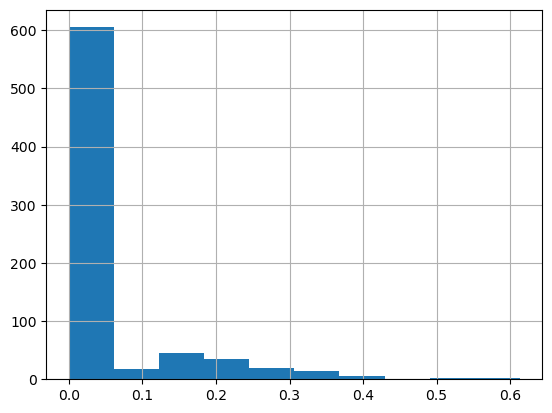

In [33]:
df1['movie'].hist()

In [34]:
df1['film'].describe()

count    748.000000
mean       0.037216
std        0.088075
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.607182
Name: film, dtype: float64

## QUESTION 2 
Using the bag-of-words/terms representation, perform classification using 3 algorithms; present and discuss the results; compare the results of the 3 algorithm

In [82]:
import numpy as np               
import pandas as pd 
import nltk
import string
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [83]:
#text preprocessing (same as last week's lab)
reviews = pd.read_csv('imdb_labelled.txt', sep='\t', header=None, names=['Text', 'Sentiment'])
print("Dataset loaded successfully!")
reviews.head()


Dataset loaded successfully!


,Text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [84]:
reviews.shape


(748, 2)

In [85]:
reviews['Sentiment'].value_counts()

Sentiment
1    386
0    362
Name: count, dtype: int64

In [88]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])


[0 0 0 0 1 0 0 1 0 1]
0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Sentiment, dtype: int64


In [89]:

#change the text column datatype to string
reviews = reviews.astype({'Text':'string'})

#get the review text for preprocessing
text = reviews['Text']
#text[:5]


In [90]:
text1 = []

for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))  
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)
    
 
#text1[:5]

In [91]:
text1 = pd.Series(text1)
#text1[:5]

In [92]:
#remove stop words
    
#Setting English stopwords
stop_words = set(stopwords.words('english'))

text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
#text1[:5]

In [94]:
#apply stemming
ps = nltk.PorterStemmer()

text1 = text1.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
text1[:5]

0        slowmov aimless movi distress drift young man
1      sure lost flat charact audienc nearli half walk
2    attempt arti black white clever camera angl mo...
3                              littl music anyth speak
4    best scene movi gerardo tri find song keep run...
dtype: object

In [95]:
reviews1 = list(zip(text1, label))

In [96]:
reviews1[:3]

[('slowmov aimless movi distress drift young man', 0),
 ('sure lost flat charact audienc nearli half walk', 0),
 ('attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost nonexist',
  0)]

In [97]:
reviewsP

,Review,Sentiment
0,slowmov aimless movi distress drift young man,0
1,sure lost flat charact audienc nearli half walk,0
2,attempt arti black white clever camera angl mo...,0
3,littl music anyth speak,0
4,best scene movi gerardo tri find song keep run...,1
...,...,...
743,got bore watch jessic lang take cloth,0
744,unfortun virtu film product work lost regrett ...,0
745,word embarrass,0
746,except bad,0


In [98]:
#may be worth shuffeling the data to prevent any ordering having an influence on the performance
reviewsP.head()

,Review,Sentiment
0,slowmov aimless movi distress drift young man,0
1,sure lost flat charact audienc nearli half walk,0
2,attempt arti black white clever camera angl mo...,0
3,littl music anyth speak,0
4,best scene movi gerardo tri find song keep run...,1


In [99]:
reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])

In [100]:
reviewsP1 = reviewsP.sample(frac=1, random_state=1).reset_index()
reviewsP1.head()

,index,Review,Sentiment
0,265,premi film ridicul presid us,0
1,519,find better movi youtub,0
2,584,saw child tv back stranger love,1
3,717,time seem film anim domin disneypixar cgi mast...,1
4,90,also real treat see anthoni quinn play crazi hor,1


In [110]:
#split the dataset  

# #train dataset by splitting the data
# train_reviews = reviewsP1.Review[:1400]
# train_sentiments = reviewsP1.Sentiment[:1400]

# #test dataset
# test_reviews = reviewsP1.Review[1400:]
# test_sentiments = reviewsP1.Sentiment[1400:]

# print(train_reviews.shape,train_sentiments.shape)
# print(test_reviews.shape,test_sentiments.shape)

from sklearn.model_selection import train_test_split

# test_size=0.2 
train_reviews, test_reviews, train_sentiments, test_sentiments = train_test_split(
    reviewsP['Review'], 
    reviewsP['Sentiment'], 
    test_size=0.2, 
    random_state=42
)

print('Train shape:', train_reviews.shape)
print('Test shape:', test_reviews.shape)

Train shape: (598,)
Test shape: (150,)


In [111]:
train_reviews[0]

'slowmov aimless movi distress drift young man'

In [112]:
#Count vectorizer for bag of words
#cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv=CountVectorizer()

#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

#vocab=cv.get_feature_names_out() #toget feature names

BOW_cv_train: (598, 2226)
BOW_cv_test: (150, 2226)


In [113]:
print(cv_train_reviews[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13 stored elements and shape (1, 2226)>
  Coords	Values
  (0, 706)	1
  (0, 911)	1
  (0, 780)	1
  (0, 731)	1
  (0, 1109)	1
  (0, 1474)	1
  (0, 500)	1
  (0, 858)	1
  (0, 988)	1
  (0, 1519)	1
  (0, 1463)	1
  (0, 170)	1
  (0, 401)	1


In [114]:
test_reviews.head()

580                          result film dont look right
356    shame see good actor like thomerson jame make ...
133        movi seem drag hero didnt realli work freedom
250                                    score mostli plot
299                       found move beauti enjoy uplift
Name: Review, dtype: object

In [115]:
#Tfidf vectorizer
#tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv=TfidfVectorizer()

#transformed train reviews
tv_train_reviews=tv.fit_transform(train_reviews)
#transformed test reviews
tv_test_reviews = tv.transform(test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (598, 2226)
Tfidf_test: (150, 2226)


In [116]:
print(tv_train_reviews[0])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13 stored elements and shape (1, 2226)>
  Coords	Values
  (0, 706)	0.12218102354636932
  (0, 911)	0.30489690831947325
  (0, 780)	0.30489690831947325
  (0, 731)	0.2632124198335075
  (0, 1109)	0.30489690831947325
  (0, 1474)	0.30489690831947325
  (0, 500)	0.28645122831589453
  (0, 858)	0.30489690831947325
  (0, 988)	0.30489690831947325
  (0, 1519)	0.2479054080026704
  (0, 1463)	0.2733638100766997
  (0, 170)	0.21637230975989685
  (0, 401)	0.30489690831947325


In [117]:
print(train_sentiments)
print(test_sentiments)

593    1
131    0
44     0
70     0
670    0
      ..
71     0
106    0
270    1
435    0
102    0
Name: Sentiment, Length: 598, dtype: int64
580    0
356    0
133    0
250    1
299    1
      ..
627    1
90     1
642    0
683    1
69     0
Name: Sentiment, Length: 150, dtype: int64


### classification

DT_bow accuracy : 0.6533333333333333
DT_tfidf accuracy : 0.6733333333333333
[[43 33]
 [19 55]] 

              precision    recall  f1-score   support

    Positive       0.69      0.57      0.62        76
    Negative       0.62      0.74      0.68        74

    accuracy                           0.65       150
   macro avg       0.66      0.65      0.65       150
weighted avg       0.66      0.65      0.65       150

[[45 31]
 [18 56]] 

              precision    recall  f1-score   support

    Positive       0.71      0.59      0.65        76
    Negative       0.64      0.76      0.70        74

    accuracy                           0.67       150
   macro avg       0.68      0.67      0.67       150
weighted avg       0.68      0.67      0.67       150

roc_auc_score for DT:  0.6744310099573256


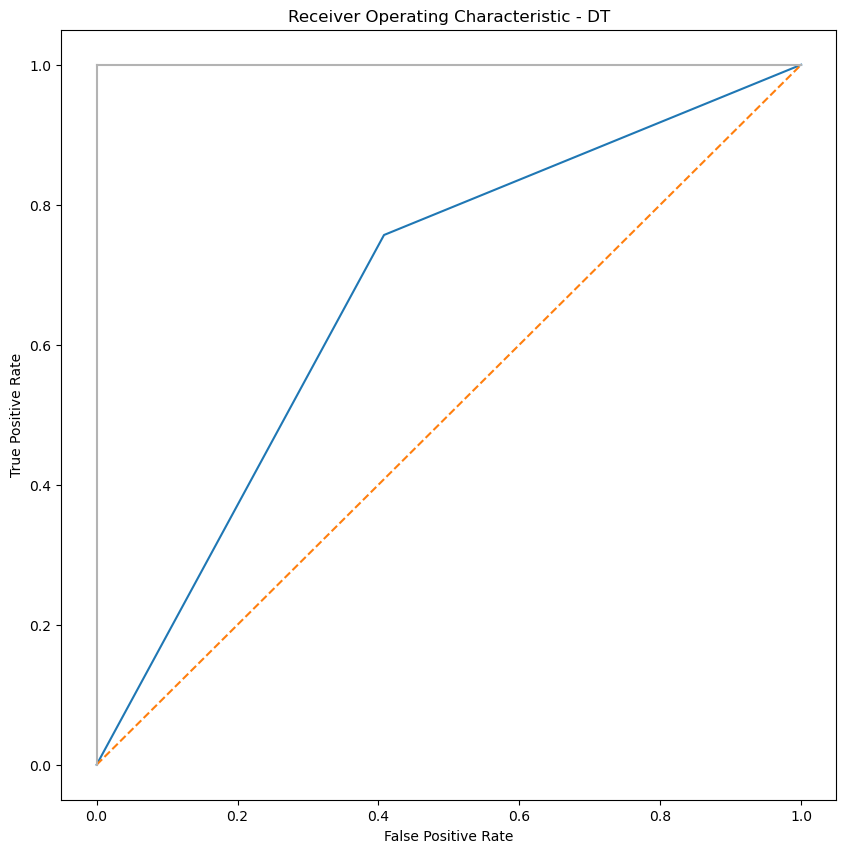

In [118]:
############################################
###           Decision Tree              ###
############################################
#training the model
DT=DecisionTreeClassifier(criterion ='entropy', random_state= 0)

#Fitting the model for Bag of words
DT_bow=DT.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
DT_tfidf=DT.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
DT_bow_predict=DT.predict(cv_test_reviews)

##Predicting the model for tfidf features
DT_tfidf_predict=DT.predict(tv_test_reviews)

#Accuracy score for bag of words
DT_bow_score=accuracy_score(test_sentiments,DT_bow_predict)
print("DT_bow accuracy :",DT_bow_score)

#Accuracy score for tfidf features
DT_tfidf_score=accuracy_score(test_sentiments,DT_tfidf_predict)
print("DT_tfidf accuracy :",DT_tfidf_score)

#Classification report for bag of words 
DT_bow_report=classification_report(test_sentiments,DT_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,DT_bow_predict), '\n')
print(DT_bow_report)

#Classification report for tfidf features
DT_tfidf_report=classification_report(test_sentiments,DT_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,DT_tfidf_predict), '\n')
print(DT_tfidf_report)

#AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, DT_tfidf_predict)
print('roc_auc_score for DT: ', roc_auc_score(test_sentiments, DT_tfidf_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DT')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
############################################
###             Naive Bayes              ###
############################################

NB = MultinomialNB()

#Fitting the model for Bag of words
NB_bow = NB.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
NB_tfidf = NB.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
NB_bow_predict = NB.predict(cv_test_reviews)

#Predicting the model for tfidf features
NB_tfidf_predict = NB.predict(tv_test_reviews)

#Accuracy score for bag of words
NB_bow_score=accuracy_score(test_sentiments,NB_bow_predict)
print("NB_bow accuracy :",NB_bow_score)

#Accuracy score for tfidf features
NB_tfidf_score=accuracy_score(test_sentiments,NB_tfidf_predict)
print("NB_tfidf accuracy :",NB_tfidf_score)

#Classification report for bag of words 
NB_bow_report=classification_report(test_sentiments,NB_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_bow_predict), '\n')
print(NB_bow_report)

#Classification report for tfidf features
NB_tfidf_report=classification_report(test_sentiments,NB_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_tfidf_predict), '\n')
print(NB_tfidf_report)

NB_bow accuracy : 0.76
NB_tfidf accuracy : 0.7666666666666667
[[51 25]
 [11 63]] 

              precision    recall  f1-score   support

    Positive       0.82      0.67      0.74        76
    Negative       0.72      0.85      0.78        74

    accuracy                           0.76       150
   macro avg       0.77      0.76      0.76       150
weighted avg       0.77      0.76      0.76       150

[[53 23]
 [12 62]] 

              precision    recall  f1-score   support

    Positive       0.82      0.70      0.75        76
    Negative       0.73      0.84      0.78        74

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



In [120]:
############################################
###                  SVM                 ###
############################################
#linear SVM
SVM = SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#Fitting the model for Bag of words
SVM_bow = SVM.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
SVM_tfidf = SVM.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
SVM_bow_predict = SVM.predict(cv_test_reviews)

#Predicting the model for tfidf features
SVM_tfidf_predict = SVM.predict(tv_test_reviews)

#Accuracy score for bag of words
SVM_bow_score=accuracy_score(test_sentiments,SVM_bow_predict)
print("SVM_bow accuracy :",SVM_bow_score)

#Accuracy score for tfidf features
SVM_tfidf_score=accuracy_score(test_sentiments,SVM_tfidf_predict)
print("SVM_tfidf accuracy :",SVM_tfidf_score)

#Classification report for bag of words 
SVM_bow_report=classification_report(test_sentiments,SVM_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_bow_predict), '\n')
print(SVM_bow_report)

#Classification report for tfidf features
SVM_tfidf_report=classification_report(test_sentiments,SVM_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_tfidf_predict), '\n')
print(SVM_tfidf_report)

SVM_bow accuracy : 0.7466666666666667
SVM_tfidf accuracy : 0.7533333333333333
[[54 22]
 [16 58]] 

              precision    recall  f1-score   support

    Positive       0.77      0.71      0.74        76
    Negative       0.72      0.78      0.75        74

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150

[[57 19]
 [18 56]] 

              precision    recall  f1-score   support

    Positive       0.76      0.75      0.75        76
    Negative       0.75      0.76      0.75        74

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150



In [121]:
############################################
###                  k-NN                ###
############################################

kNN = KNeighborsClassifier(n_neighbors=7) # we can do trail and error to find the best k value, eg: 1 to 20. 

#Fitting the model for Bag of words
kNN_bow = kNN.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
kNN_tfidf = kNN.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
kNN_bow_predict = kNN.predict(cv_test_reviews)

#Predicting the model for tfidf features
kNN_tfidf_predict = kNN.predict(tv_test_reviews)

#Accuracy score for bag of words
kNN_bow_score=accuracy_score(test_sentiments,kNN_bow_predict)
print("kNN_bow accuracy :",kNN_bow_score)

#Accuracy score for tfidf features
kNN_tfidf_score=accuracy_score(test_sentiments,kNN_tfidf_predict)
print("kNN_tfidf accuracy :",kNN_tfidf_score)

#Classification report for bag of words 
kNN_bow_report=classification_report(test_sentiments,kNN_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,kNN_bow_predict), '\n')
print(kNN_bow_report)

#Classification report for tfidf features
kNN_tfidf_report=classification_report(test_sentiments,kNN_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,kNN_tfidf_predict), '\n')
print(kNN_tfidf_report)

kNN_bow accuracy : 0.7666666666666667
kNN_tfidf accuracy : 0.7066666666666667
[[49 27]
 [ 8 66]] 

              precision    recall  f1-score   support

    Positive       0.86      0.64      0.74        76
    Negative       0.71      0.89      0.79        74

    accuracy                           0.77       150
   macro avg       0.78      0.77      0.76       150
weighted avg       0.79      0.77      0.76       150

[[37 39]
 [ 5 69]] 

              precision    recall  f1-score   support

    Positive       0.88      0.49      0.63        76
    Negative       0.64      0.93      0.76        74

    accuracy                           0.71       150
   macro avg       0.76      0.71      0.69       150
weighted avg       0.76      0.71      0.69       150



## question 3 
 Perform classification using a BERT-based model with fine-tuning and compare the results with the 3 algorithms from Task 2. 

In [1]:
import tensorflow as tf
import sys
print(f"Python version: {sys.version}")
print(f"TensorFlow version: {tf.__version__}")

c:\Users\frank\.conda\envs\py311\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


Python version: 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
TensorFlow version: 2.18.1


In [ ]:
from transformers import BertTokenizer
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text_input = ['Hello world']

encoded_input = tokenizer(text_input, return_tensors='tf', padding=True, truncation=True)
print(encoded_input)


c:\Users\frank\.conda\envs\py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


{'input_ids': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[ 101, 7592, 2088,  102]])>, 'token_type_ids': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[0, 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 1, 1, 1]])>}


In [4]:

import os
import shutil
os.environ["TF_USE_LEGACY_KERAS"] = "1"
import tensorflow as tf
# import tensorflow_hub as hub
# import tensorflow_text as text
# from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt


In [5]:
import pandas as pd
reviews = pd.read_csv('imdb_labelled.txt', sep='\t', header=None, names=['Text', 'Sentiment'])
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [6]:
reviews.head()

,Text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
reviews.shape

(748, 2)

In [8]:
reviews['Sentiment'].value_counts()

Sentiment
1    386
0    362
Name: count, dtype: int64

In [9]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[0 0 0 0 1 0 0 1 0 1]
0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Sentiment, dtype: int64


In [10]:
reviews1 = list(zip(reviews['Text'], label))

reviews1 = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviews1

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [11]:
#may be worth shuffeling the data to prevent any ordering having an influence on the performance

reviews1 = reviews1.sample(frac=1, random_state=1)
reviews1.reset_index(drop=True, inplace=True)


In [12]:
#may be worth shuffeling the data to prevent any ordering having an influence on the performance

reviews1 = reviews1.sample(frac=1, random_state=1)
reviews1.reset_index(drop=True, inplace=True)
reviews1.head()

,Review,Sentiment
0,"All the actors give a wonderful performance, e...",1
1,"Initially the local sites in the film, which w...",1
2,I highly doubt that anyone could ever like thi...,0
3,") a happy, wonderful, feel good ending!",1
4,But it wasn't until I watched this film that I...,1


In [13]:
from sklearn.model_selection import train_test_split

#split and take the test set
X, X_test, y, y_test = (train_test_split(reviews1['Review'], reviews1['Sentiment'],
                                                     stratify=reviews1['Sentiment'],
                                                     test_size=0.2,
                                                     train_size=0.8
                                                     ))



In [14]:

#split the train set (X) into train and validation
X_train, X_val, y_train, y_val = (train_test_split(X, y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     train_size=0.75
                                                     ))


In [15]:
X_train 

13     Still, I do like this movie for it's empowerme...
680    The rest of the movie lacks art, charm, meanin...
324    My only problem is I thought the actor playing...
671                    The film looks cheap and bland.  
365    The result is a film that just don't look righ...
                             ...                        
387    It rocked my world and is certainly a must see...
378    However Paul Schrader has indeed made a film "...
676    Hayao Miyazaki's latest and eighth film for St...
395    I didn't realize how wonderful the short reall...
278    The art style has the appearance of crayon/pen...
Name: Review, Length: 448, dtype: object

In [16]:
X_val

595    The plot is nonsense that doesn't interest in ...
453    I don't know exactly what it is about this mov...
430    The attempts at humor were pitiful and story i...
380    The plot has more holes than a pair of fishnet...
79     You'd have to have the IQ of particularly stup...
                             ...                        
358    For people who are first timers in film making...
317    The only thing really worth watching was the s...
346    The good cinematography also makes her and Mon...
630    Despite the pans of reviewers, I liked this mo...
300    An Italian reviewer called this "a small, grea...
Name: Review, Length: 150, dtype: object

In [17]:
X_test

396    I was left shattered from the experience of wa...
92                      So bad...well...it's just bad.  
644    I won't say any more - I don't like spoilers, ...
585    Don't waste your time watching this rubbish no...
224    Lucy Bell is so much higher than this crap and...
                             ...                        
58     Punishment Park is a brilliant piece of cinema.  
535    The directing and the cinematography aren't qu...
561    putting the race card aside, lets look at the ...
352    This movie is a solid example of a bad plot an...
329    I was particularly pleased with the acting abi...
Name: Review, Length: 150, dtype: object

In [18]:
#@title Choose a BERT model to fine-tune

#the model has 5 layers (L), 512 hidden size H and 8 attention heads
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [19]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

bert_model = TFBertModel.from_pretrained('bert-base-uncased', use_safetensors=False)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training

In [20]:
reviews1['Review']

0      All the actors give a wonderful performance, e...
1      Initially the local sites in the film, which w...
2      I highly doubt that anyone could ever like thi...
3              ) a happy, wonderful, feel good ending!  
4      But it wasn't until I watched this film that I...
                             ...                        
743                                      I enjoyed it.  
744         Lame would be the best way to describe it.  
745                                    It is shameful.  
746    The acting was decidely wooden, though no wors...
747    He is almost unbearable to watch on screen, he...
Name: Review, Length: 748, dtype: object

In [21]:
text_test = ["This was a superb episode, one of the best of both seasons. Down right horror for a change, with a story that is way way above the average MOH episodes, if there is such a thing. A man's wife is almost burned to death in a tragic car wreck, in which he was driving. His airbag worked, her's didn't. She is burned beyond recognition (great makeup btw), and not given much of a chance to live without a full skin graft. BUT, even in a coma, she keeps dying but brought back by modern technology, and when she does die for a few minutes, her ghost appears as a very vengeful spirit. Carnage of course ensues, and also some extremely gory killings, and also, some extremely sexy scenes. What more could you ask for, you might ask? Well, not much, because this baby has it all, and a very satirical ending, that should leave a smile on most viewers faces. I just loved Rob Schmidt's (Wrong Turn) direction too, he has a great knack for horror. Excellent episode, this is one I'm buying for sure.This was a superb episode, one of the best of both seasons."]

text_preprocessed = tokenizer(
    text_test, 
    padding='max_length', 
    truncation=True, 
    max_length=128, 
    return_tensors='tf'
)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_ids"].shape}')  
print(f'Word Ids   : {text_preprocessed["input_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["attention_mask"][0, :12]}') 
print(f'Type Ids   : {text_preprocessed["token_type_ids"][0, :12]}') 


Keys       : ['input_ids', 'token_type_ids', 'attention_mask']
Shape      : (1, 128)
Word Ids   : [  101  2023  2001  1037 21688  2792  1010  2028  1997  1996  2190  1997]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased', use_safetensors=False)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [23]:

bert_results = bert_model(
    input_ids=text_preprocessed['input_ids'],
    attention_mask=text_preprocessed['attention_mask'],
    token_type_ids=text_preprocessed['token_type_ids']
)

print(f'Loaded BERT Model')
print(f'Pooled Output Shape   : {bert_results.pooler_output.shape}')
print(f'Sequence Output Shape : {bert_results.last_hidden_state.shape}')
print(f'Pooled Output Values  : {bert_results.pooler_output[0, :12]}')

Loaded BERT Model
Pooled Output Shape   : (1, 768)
Sequence Output Shape : (1, 128, 768)
Pooled Output Values  : [-0.53255594 -0.49305916 -0.94860643  0.33427817  0.70734996 -0.1345589
  0.06491638  0.37824512 -0.885911   -0.99989986 -0.656593    0.891923  ]


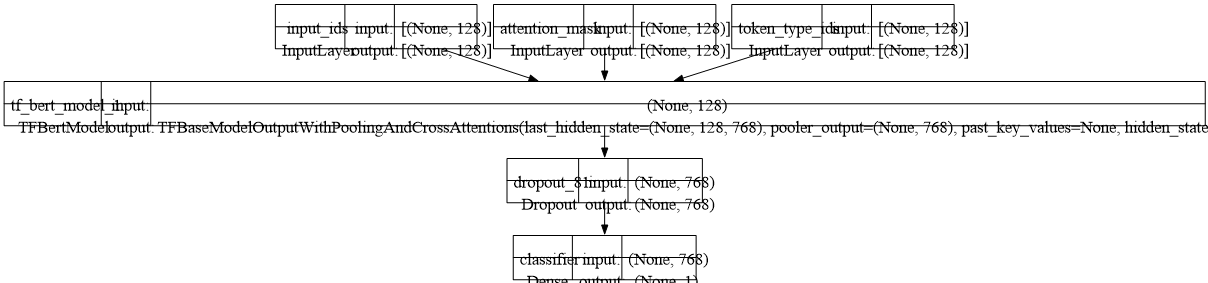

In [32]:
def build_classifier_model():
    input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')
    token_type_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='token_type_ids')
    
    results = bert_model(
        input_ids=input_ids, 
        attention_mask=attention_mask, 
        token_type_ids=token_type_ids
    )
    
    pooled_output = results.pooler_output
    
    net = tf.keras.layers.Dropout(0.1)(pooled_output)
    
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    
    return tf.keras.Model(
        inputs=[input_ids, attention_mask, token_type_ids], 
        outputs=net
    )
classifier_model = build_classifier_model()

tf.keras.utils.plot_model(classifier_model, show_shapes=True, dpi=64)


In [41]:
from transformers import create_optimizer

epochs = 6
steps_per_epoch = 1200  
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)
init_lr = 3e-5

optimizer, schedule = create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    weight_decay_rate=0.01
)

print(f"Optimizer created: {type(optimizer)}")
print(f"Total training steps: {num_train_steps}, Warmup steps: {num_warmup_steps}")

Optimizer created: <class 'transformers.optimization_tf.AdamWeightDecay'>
Total training steps: 7200, Warmup steps: 720


In [42]:
#fine-tune BERT for classification
classifier_model.compile(optimizer,
                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
classifier_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 token_type_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                            

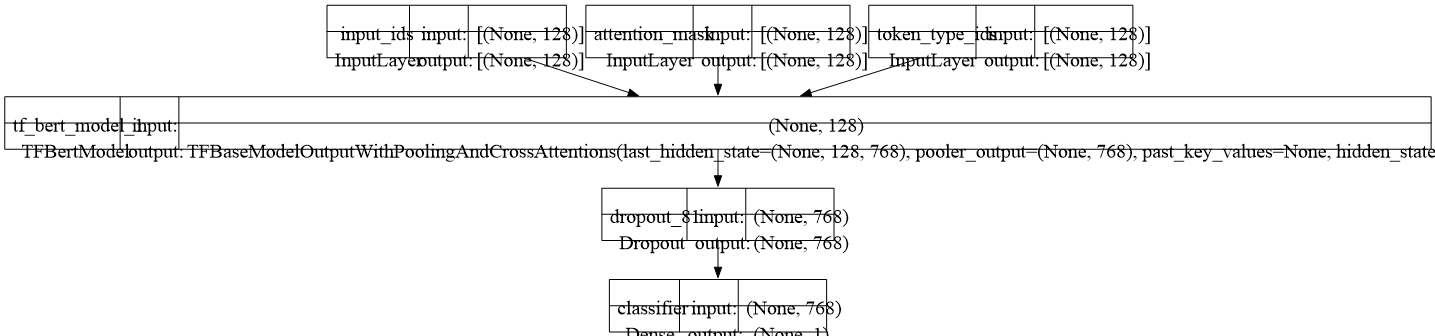

In [43]:
tf.keras.utils.plot_model(model=classifier_model,show_shapes=True,dpi=76)

In [49]:

def preprocess_data(texts, labels, tokenizer, max_len=128):
    text_list = texts.tolist() if hasattr(texts, 'tolist') else list(texts)
    
    encoded = tokenizer(
        text_list,
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='tf'
    )
    
    x = {
        'input_ids': encoded['input_ids'],
        'attention_mask': encoded['attention_mask'],
        'token_type_ids': encoded['token_type_ids']
    }
    y = tf.convert_to_tensor(labels) if labels is not None else None
    
    return x, y

print("(Training Data)...")
x_train_processed, y_train_processed = preprocess_data(X_train, y_train, tokenizer)

print("(Validation Data)...")
x_val_processed, y_val_processed = preprocess_data(X_val, y_val, tokenizer)

print("Completed preprocessing.")

(Training Data)...
(Validation Data)...
Completed preprocessing.


In [48]:
import tensorflow as tf

print("Creating dummy input for warm-up...")
dummy_text = ["This is a warm-up sentence to initialize model weights."]
dummy_input = tokenizer(
    dummy_text, 
    padding='max_length', 
    truncation=True, 
    max_length=128, 
    return_tensors='tf'
)
try:
    print("warmup BERT model...")
    bert_model(
        input_ids=dummy_input['input_ids'],
        attention_mask=dummy_input['attention_mask'],
        token_type_ids=dummy_input['token_type_ids']
    )
    print("BERT model variables initialized successfully!")
except Exception as e:
    print(f"Warning or error occurred during warm-up: {e}")

Creating dummy input for warm-up...
warmup BERT model...
BERT model variables initialized successfully!


In [51]:
classifier_model = build_classifier_model()

classifier_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.metrics.BinaryAccuracy()]
)

print("model built and compiled.")

model built and compiled.


In [ ]:
print(f'Training model with BERT (Hugging Face version)...')

history = classifier_model.fit(
    x=x_train_processed,
    y=y_train_processed,
    validation_data=(x_val_processed, y_val_processed),
    epochs=epochs,
    batch_size=16  
)

Training model with BERT (Hugging Face version)...
Epoch 1/6
28/28 [==============================] - 215s 7s/step - loss: 0.7009 - binary_accuracy: 0.5112 - val_loss: 0.6979 - val_binary_accuracy: 0.4800
Epoch 2/6
28/28 [==============================] - 226s 8s/step - loss: 0.6866 - binary_accuracy: 0.4955 - val_loss: 0.6760 - val_binary_accuracy: 0.4867
Epoch 3/6
28/28 [==============================] - 245s 9s/step - loss: 0.6607 - binary_accuracy: 0.5670 - val_loss: 0.6306 - val_binary_accuracy: 0.5067
Epoch 4/6
28/28 [==============================] - 246s 9s/step - loss: 0.5762 - binary_accuracy: 0.6607 - val_loss: 0.5101 - val_binary_accuracy: 0.7933
Epoch 5/6
28/28 [==============================] - 207s 7s/step - loss: 0.4148 - binary_accuracy: 0.8571 - val_loss: 0.2713 - val_binary_accuracy: 0.9467
Epoch 6/6
28/28 [==============================] - 101s 4s/step - loss: 0.2106 - binary_accuracy: 0.9509 - val_loss: 0.1263 - val_binary_accuracy: 0.9667


Keys: dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


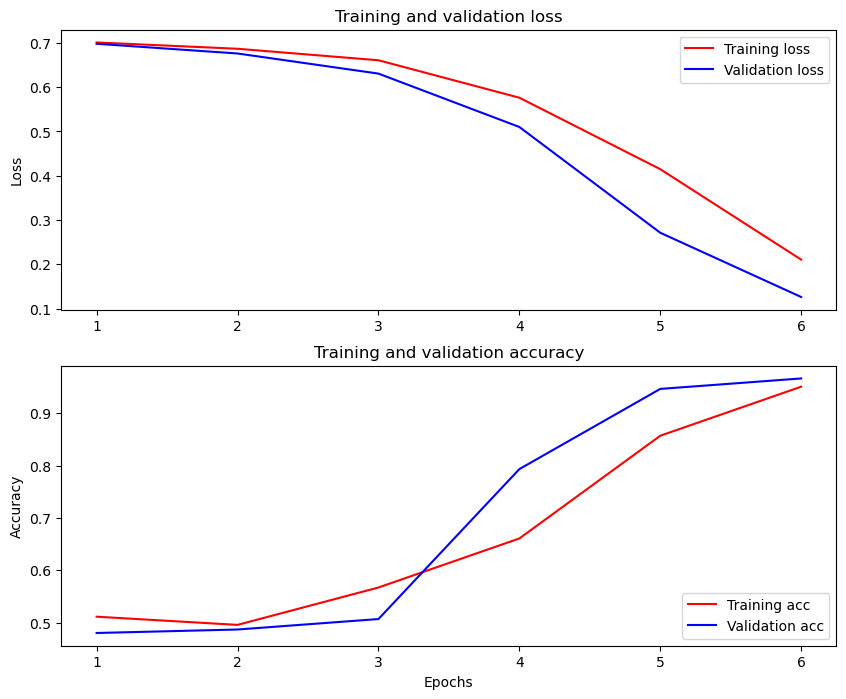

In [53]:
import matplotlib.pyplot as plt

history_dict = history.history
print("Keys:", history_dict.keys())

acc_key = 'binary_accuracy' if 'binary_accuracy' in history_dict else 'accuracy'
val_acc_key = 'val_' + acc_key

acc = history_dict[acc_key]
val_acc = history_dict[val_acc_key]
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_range = range(1, len(acc) + 1)

fig = plt.figure(figsize=(10, 8)) 
fig.tight_layout()

# --- 1: Loss ---
plt.subplot(2, 1, 1)
plt.plot(epochs_range, loss, 'r', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

# --- 2: Accuracy ---
plt.subplot(2, 1, 2)
plt.plot(epochs_range, acc, 'r', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [56]:

x_test_processed, y_test_processed = preprocess_data(X_test, y_test, tokenizer)

print("evaluating...")
loss, accuracy = classifier_model.evaluate(x_test_processed, y_test_processed)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

evaluating...
5/5 [==============================] - 8s 2s/step - loss: 0.2434 - binary_accuracy: 0.9200
Loss: 0.2434196174144745
Accuracy: 0.9200000166893005


In [60]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_test_processed, y_test_processed = preprocess_data(X_test, y_test, tokenizer)
#predicted values using the model
y_pred=classifier_model.predict(X_test_processed)

print(y_pred.flatten())

5/5 [==============================] - 12s 2s/step
[-0.04680483 -2.5294049   1.5957445  -2.4164321  -2.726598   -2.6562011
 -3.6008723   3.8160274   3.1220348   0.97360486 -3.041189    2.4379199
 -3.5784438  -3.1956632   2.9853332   2.8915076  -3.0138023   3.5974584
 -3.0354855   3.870351   -3.4560344   3.0607326  -3.2426212   3.2210667
 -2.2063413  -1.9161156  -3.3073418  -2.98041    -0.7102986   3.6911082
  1.9249328   1.7791399  -2.7212563   2.9187658   3.7123387  -2.8983414
  3.009372   -2.8115149   2.179417    3.528131    0.26427403  0.89016545
 -3.091973    0.4154566  -2.482875    3.4414227  -2.6955483   2.3504546
 -1.7897416   2.9024842   1.7034525  -1.8374335   3.0403466  -3.1682599
  3.3211179   1.1384778  -2.894595    3.7295933   2.0302675   1.82192
  2.5290139   1.4150766   3.7682128   2.7904842  -2.4448087  -2.490166
 -3.0152206   3.211838   -3.00501     2.812485   -2.8373566   3.0052712
  1.9891504   3.1972728  -1.3674532   3.4237173   2.5159218  -2.4008152
  3.7757084  -3

In [61]:
#len(y_pred)

for i in range(len(y_pred)):
  if y_pred[i]<0.5:
    y_pred[i] = 0
  else: y_pred[i] = 1

print(y_pred.flatten())

[0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1.]


In [62]:
import numpy as np
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_test, y_pred), '\n')
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[67  6]
 [ 6 71]] 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        73
           1       0.92      0.92      0.92        77

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

Accuracy: 0.92
AUC: 0.9199430706280021


## QUESTION 4
Perform topic detection using 1 algorithm using 10 as the parameter for the number of topics; present and discuss each topic, and assess the quality of the detected topics. 

In [1]:
import numpy as np
import pandas as pd
import nltk
import string

In [2]:
reviews = pd.read_csv('imdb_labelled.txt', sep='\t', header=None, names=['Text', 'Sentiment'])
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
reviews.head()

,Text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
# Create a new column containing the length each review
reviews["Text_len"] = reviews["Text"].apply(lambda x : len(x.split()))

In [5]:
print("The longest review has: {} words".format(reviews.Text_len.max()))

The longest review has: 1390 words


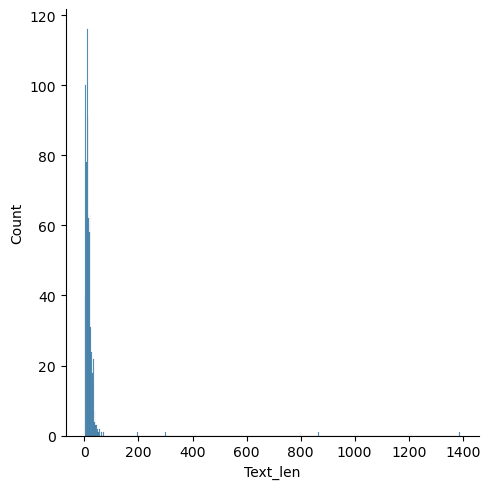

In [6]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(reviews.Text_len, kde=False)

In [7]:
text = reviews['Text']

text1 = []

for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)


text1[:2]

['a very very very slowmoving aimless movie about a distressed drifting young man  ',
 'not sure who was more lost  the flat characters or the audience nearly half of whom walked out  ']

In [8]:
text1 = pd.Series(text1)
text1[:2]

0    a very very very slowmoving aimless movie abou...
1    not sure who was more lost  the flat character...
dtype: object

In [9]:
#remove stop words
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['film','movie', 'get', 'see', 'make', 'one']
stopwords.extend(newStopWords)

#Setting English stopwords
stop_words = set(stopwords)

#text = reviews['Text']
text2 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
text2[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0     slowmoving aimless distressed drifting young man
1    sure lost flat characters audience nearly half...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene gerardo trying find song keeps runn...
dtype: object

In [10]:
#apply lemmatising with POS tags

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer


from nltk.corpus import wordnet

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text3 = text2.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:2]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        slowmoving aimless distressed drift young man
1    sure lose flat character audience nearly half ...
dtype: object

In [11]:
reviews['Text'] = text3
reviews.head()

,Text,Sentiment,Text_len
0,slowmoving aimless distressed drift young man,0,13
1,sure lose flat character audience nearly half ...,0,19
2,attempt artiness black white clever camera ang...,0,31
3,little music anything speak,0,8
4,best scene gerardo try find song keep run head,1,21


In [12]:
# Create a new column containing the length each review after preprocessing
reviews["Text_len"] = reviews["Text"].apply(lambda x : len(x.split()))

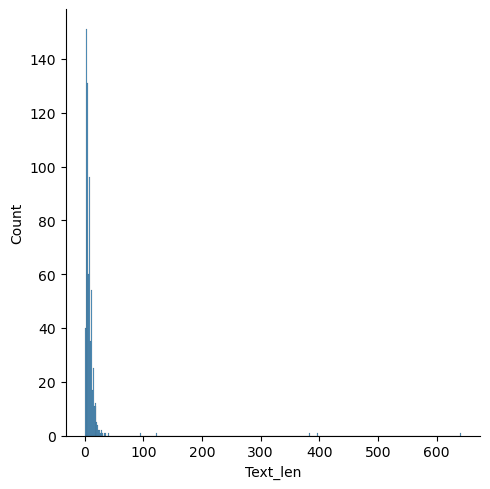

In [13]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(reviews.Text_len, kde=False)

In [14]:
from bertopic import BERTopic


model = BERTopic(
    verbose=True,
    embedding_model='paraphrase-MiniLM-L3-v2', 
    nr_topics=10
)

topics, probs = model.fit_transform(reviews['Text']) 

# --- display topics ---
print(model.get_topic_info()) 

for i in range(10):
    print(f"\nTopic {i}:")
    try:
        print(model.get_topic(i))
    except:
        print("no such topic")

c:\Users\frank\.conda\envs\py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2026-01-05 01:18:56,424 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 24/24 [00:01<00:00, 17.92it/s]
2026-01-05 01:19:00,393 - BERTopic - Embedding - Completed ✓
2026-01-05 01:19:00,397 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2026-01-05 01:19:14,619 - BERTopic - Dimensionality - Completed ✓
2026-01-05 01:19:14,619 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-05 01:19:14,649 - BERTopic - Cluster - Completed ✓
2026-01-05 01:19:14,651 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2026-01-05 01:19:14,674 - BERTopic - Representation - Completed ✓
2026-01-05 01:19:14,675 - BERTopic - Topic reduction - Reducing number of topics
2026-01-05 01:19:14,681 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-05 01:19:14,702 - BERTopic - Representation - Completed ✓
2026-01-05 01:19:14,702 - BERTopic - Topic reduction - Redu

   Topic  Count                                Name  \
0     -1    318          -1_bad_character_good_well   
1      0    254             0_watch_great_film_like   
2      1     64             1_awful_bad_stupid_even   
3      2     22             2_give_like_social_blew   
4      3     20           3_waste_time_garbage_dont   
5      4     18  4_recommend_definitely_worth_check   
6      5     16            5_plot_line_doesnt_didnt   
7      6     13  6_spoiler_wont_dont_disappointment   
8      7     12         7_act_balance_least_however   
9      8     11              8_rent_paid_scale_rate   

                                      Representation  \
0  [bad, character, good, well, love, scene, scri...   
1  [watch, great, film, like, character, movie, b...   
2  [awful, bad, stupid, even, thought, everything...   
3  [give, like, social, blew, outlet, physical, h...   
4  [waste, time, garbage, dont, trash, store, she...   
5  [recommend, definitely, worth, check, advise, ...   
6 

In [15]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 10


,Topic,Count,Name,Representation,Representative_Docs
0,-1,318,-1_bad_character_good_well,"[bad, character, good, well, love, scene, scri...","[look like wonderful story, bad character bad ..."
1,0,254,0_watch_great_film_like,"[watch, great, film, like, character, movie, b...",[love end perfect youll shed tear thrill see l...
2,1,64,1_awful_bad_stupid_even,"[awful, bad, stupid, even, thought, everything...","[bad, awful, awful]"
3,2,22,2_give_like_social_blew,"[give, like, social, blew, outlet, physical, h...","[give look, rock world certainly must anyone s..."
4,3,20,3_waste_time_garbage_dont,"[waste, time, garbage, dont, trash, store, she...","[otherwise dont even waste time, dont waste ti..."


In [16]:
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,318,-1_bad_character_good_well,"[bad, character, good, well, love, scene, scri...","[look like wonderful story, bad character bad ..."
1,0,254,0_watch_great_film_like,"[watch, great, film, like, character, movie, b...",[love end perfect youll shed tear thrill see l...
2,1,64,1_awful_bad_stupid_even,"[awful, bad, stupid, even, thought, everything...","[bad, awful, awful]"
3,2,22,2_give_like_social_blew,"[give, like, social, blew, outlet, physical, h...","[give look, rock world certainly must anyone s..."
4,3,20,3_waste_time_garbage_dont,"[waste, time, garbage, dont, trash, store, she...","[otherwise dont even waste time, dont waste ti..."
5,4,18,4_recommend_definitely_worth_check,"[recommend, definitely, worth, check, advise, ...","[see definitely recommend, recommend, recommend]"
6,5,16,5_plot_line_doesnt_didnt,"[plot, line, doesnt, didnt, way, smoothly, con...",[secondary plot line incomprehensible relation...
7,6,13,6_spoiler_wont_dont_disappointment,"[spoiler, wont, dont, disappointment, forget, ...",[handle tough issue dignity grace course shock...
8,7,12,7_act_balance_least_however,"[act, balance, least, however, mountain, perso...",[act whole cast could put scale balance perfec...
9,8,11,8_rent_paid_scale_rate,"[rent, paid, scale, rate, much, thing, youdo, ...","[go rent, warn youdo rent dumbest thing never ..."


In [18]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

# all topic frequencies
freq = model.get_topic_info()


print("all topic frequencies:")
for i in range(len(freq)):
    topic_id = freq.iloc[i]["Topic"]
    
    topic_words = model.get_topic(topic_id) 
    
    if topic_words: 
        print(f"\nTopic {topic_id}:")
        print(topic_words[:5])

all topic frequencies:

Topic -1:
[('bad', 0.024642913030636218), ('character', 0.023589912732224955), ('good', 0.02113188771274775), ('well', 0.019254077964407024), ('love', 0.018612601662262834)]

Topic 0:
[('watch', 0.02914015821305651), ('great', 0.02678220898022291), ('film', 0.024444682752644293), ('like', 0.023230683220017968), ('character', 0.022595240390760805)]

Topic 1:
[('awful', 0.13710566363371787), ('bad', 0.1313139670252543), ('stupid', 0.08724905867600229), ('even', 0.055929692439679816), ('thought', 0.05177825325594565)]

Topic 2:
[('give', 0.42614469241940306), ('like', 0.1960907927187158), ('social', 0.16786629258360317), ('blew', 0.16786629258360317), ('outlet', 0.16786629258360317)]

Topic 3:
[('waste', 0.2471934124602772), ('time', 0.13704850426279366), ('garbage', 0.1307644466029887), ('dont', 0.11786980854153704), ('trash', 0.10988906327496839)]

Topic 4:
[('recommend', 0.6478292077727799), ('definitely', 0.3114980875340035), ('worth', 0.2856361549336136), ('ch

In [19]:
model.visualize_barchart(n_words=10)

In [20]:
model.visualize_topics()

In [22]:
topic_info = model.get_topic_info()

print(f"{'Topic':<6} {'Count':<6} {'Name':<30} {'Top Words'}")
print("-" * 100)

for index, row in topic_info.iterrows():
    topic_id = row['Topic']
    count = row['Count']
    name = row['Name']
    
    keywords = model.get_topic(topic_id)
    
    if keywords:
        top_words_list = [word for word, score in keywords[:10]] 
        top_words_str = ", ".join(top_words_list)
        
        print(f"{topic_id:<6} {count:<6} {name[:30]:<30} {top_words_str}")


Topic  Count  Name                           Top Words
----------------------------------------------------------------------------------------------------
-1     318    -1_bad_character_good_well     bad, character, good, well, love, scene, script, look, write, work
0      254    0_watch_great_film_like        watch, great, film, like, character, movie, bad, really, actor, good
1      64     1_awful_bad_stupid_even        awful, bad, stupid, even, thought, everything, make, try, understand, find
2      22     2_give_like_social_blew        give, like, social, blew, outlet, physical, horrendous, carry, rock, reveal
3      20     3_waste_time_garbage_dont      waste, time, garbage, dont, trash, store, shelf, anyone, ever, money
4      18     4_recommend_definitely_worth_c recommend, definitely, worth, check, advise, anyone, good, others, confidence, transfer
5      16     5_plot_line_doesnt_didnt       plot, line, doesnt, didnt, way, smoothly, convolute, primary, secondary, convince
6  